**ONLY CHANGE THIS**

In [ ]:
# Insert excel file path to this variable (ONLY .xlsx format)
review_file_name = "/content/Analisa Review Huang.xlsx"

# Define the minimum star rating for a review to be considered "GOOD"
good_review_min_star = 4

# Define the maximum star rating for a review to be considered "BAD"
bad_review_max_star = 2

# Word cloud shape (only black and white image, no grayscale, ONLY .jpg format)
wc_image = "/content/epivox_logo_grad (1).jpg"

# Imports and Initiation

In [ ]:
!pip install deep_translator wordcloud

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from deep_translator import GoogleTranslator
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from PIL import Image
from wordcloud import WordCloud
import unicodedata
import re

In [ ]:
# Download NLTK data (only needed the first time)
download_dir = "/content/"
nltk.data.path.append(download_dir)
nltk.download("punkt_tab", download_dir=download_dir)
nltk.download("stopwords", download_dir=download_dir)
nltk.download("wordnet", download_dir=download_dir)

[nltk_data] Downloading package punkt_tab to /content/...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /content/...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /content/...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
df_raw = pd.read_excel(review_file_name)

# Data Preprocessing

Show and determine which columns to extract

In [ ]:
df_raw.head()

,query,name,google_id,place_id,location_link,reviews_link,reviews,rating,review_id,review_pagination_id,...,review_rating,review_timestamp,review_datetime_utc,review_likes,reviews_id,reviews_per_score_1,reviews_per_score_2,reviews_per_score_3,reviews_per_score_4,reviews_per_score_5
0,0x2dd7fa3814bf4177:0x4f67ff3659b3f3ea,Huang Reflexology,0x2dd7fa3814bf4177:0x4f67ff3659b3f3ea,ChIJd0G_FDj61y0R6vOzWTb_Z08,https://www.google.com/maps/place/Huang+Reflex...,https://search.google.com/local/reviews?placei...,146,4.3,ChdDSUhNMG9nS0VJQ0FnTUNBcGVqT3ZBRRAB,CAESYENBRVFBUnBDUTJrNFNVRlNTVzVEWjI5QlVEY3lSM0...,...,5,1738510510,02/02/2025 15:35:10,NaN,5721822460495786986,8,5,11,30,92
1,0x2dd7fa3814bf4177:0x4f67ff3659b3f3ea,Huang Reflexology,0x2dd7fa3814bf4177:0x4f67ff3659b3f3ea,ChIJd0G_FDj61y0R6vOzWTb_Z08,https://www.google.com/maps/place/Huang+Reflex...,https://search.google.com/local/reviews?placei...,146,4.3,ChdDSUhNMG9nS0VJQ0FnTUNBbWMzdG1RRRAB,CAESYENBRVFBaHBDUTJrNFNVRlNTVzVEWjI5QlVEY3lSM0...,...,5,1738479896,02/02/2025 07:04:56,NaN,5721822460495786986,8,5,11,30,92
2,0x2dd7fa3814bf4177:0x4f67ff3659b3f3ea,Huang Reflexology,0x2dd7fa3814bf4177:0x4f67ff3659b3f3ea,ChIJd0G_FDj61y0R6vOzWTb_Z08,https://www.google.com/maps/place/Huang+Reflex...,https://search.google.com/local/reviews?placei...,146,4.3,ChdDSUhNMG9nS0VJQ0FnSUREdXR6aXRnRRAB,CAESY0NBRVFDQnBFUTJwRlNVRlNTWEJEWjI5QlVEY3lSel...,...,3,1724834965,08/28/2024 08:49:25,NaN,5721822460495786986,8,5,11,30,92
3,0x2dd7fa3814bf4177:0x4f67ff3659b3f3ea,Huang Reflexology,0x2dd7fa3814bf4177:0x4f67ff3659b3f3ea,ChIJd0G_FDj61y0R6vOzWTb_Z08,https://www.google.com/maps/place/Huang+Reflex...,https://search.google.com/local/reviews?placei...,146,4.3,ChdDSUhNMG9nS0VJQ0FnSUR5NTRPcm9nRRAB,CAESY0NBRVFQUnBFUTJwRlNVRlNTWEJEWjI5QlVEY3lTV1...,...,3,1616239626,03/20/2021 11:27:06,NaN,5721822460495786986,8,5,11,30,92
4,0x2dd7fa3814bf4177:0x4f67ff3659b3f3ea,Huang Reflexology,0x2dd7fa3814bf4177:0x4f67ff3659b3f3ea,ChIJd0G_FDj61y0R6vOzWTb_Z08,https://www.google.com/maps/place/Huang+Reflex...,https://search.google.com/local/reviews?placei...,146,4.3,ChZDSUhNMG9nS0VJQ0FnSUNYNFptd0xnEAE,CAESY0NBRVFCUnBFUTJwRlNVRlNTWEJEWjI5QlVEY3lSek...,...,5,1729171752,10/17/2024 13:29:12,NaN,5721822460495786986,8,5,11,30,92


In [ ]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   query                                146 non-null    object 
 1   name                                 146 non-null    object 
 2   google_id                            146 non-null    object 
 3   place_id                             146 non-null    object 
 4   location_link                        146 non-null    object 
 5   reviews_link                         146 non-null    object 
 6   reviews                              146 non-null    int64  
 7   rating                               146 non-null    float64
 8   review_id                            146 non-null    object 
 9   review_pagination_id                 145 non-null    object 
 10  author_link                          146 non-null    object 
 11  author_title                    

In [ ]:
extract_column_name = ["review_rating", "review_text"]

In [ ]:
df = df_raw[extract_column_name]
df

,review_rating,review_text
0,5,NaN
1,5,NaN
2,3,"Datang lagi kemari bulan lalu, sebelah berisik..."
3,3,👍👍👍
4,5,Pelayanan ramah. Tempatnya bersih dan rapi. Pi...
...,...,...
141,1,Udah pesan dan ok dan 5 menit di telpon dan bi...
142,5,"Bersih, dingin, nyaman, therapist OK, tidak ad..."
143,5,"Langganan kalau pas lagi capek, therapist nya..."
144,4,Nice place and therapist for sure! Harus coba ...


Remove any rows that have missing values in the dataframe, we don't need empty review text

In [ ]:
df = df.dropna(subset=["review_text"]).reset_index(drop=True)
df

,review_rating,review_text
0,3,"Datang lagi kemari bulan lalu, sebelah berisik..."
1,3,👍👍👍
2,5,Pelayanan ramah. Tempatnya bersih dan rapi. Pi...
3,5,Parkir kurang luas.\nAdmin ramah.\nRuangan nya...
4,5,"3x pijat di sini, dgn Terapis yg beda. Semuany..."
...,...,...
76,1,Udah pesan dan ok dan 5 menit di telpon dan bi...
77,5,"Bersih, dingin, nyaman, therapist OK, tidak ad..."
78,5,"Langganan kalau pas lagi capek, therapist nya..."
79,4,Nice place and therapist for sure! Harus coba ...


Check review frequency on each rating

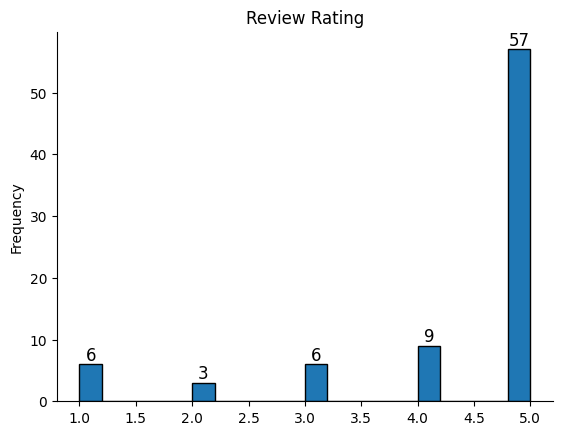

In [ ]:
ax = df['review_rating'].plot(kind='hist', bins=20, title='Review Rating', edgecolor='black')

plt.gca().spines[['top', 'right']].set_visible(False)

# Annotate bars with counts
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Avoid labels on empty bars
        ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2, height),
                    ha='center', va='bottom', fontsize=12)

plt.show()

Translate the review text into English to ensure consistency in wording

In [ ]:
def translate_review(df):
  translator = GoogleTranslator(source="auto", target="en")

  # make a copy of the df and store it to new column
  translated_df = df.copy()
  translated_df["review_text_en"] = ""

  # Go through each review and translate it
  for index, row in translated_df.iterrows():
    try:
      text = str(row['review_text'])
      if text and text.strip():  # Only translate if there's actual text
        translated = translator.translate(text)
        translated_df.at[index, 'review_text_en'] = translated

        if (index % 10 == 0 or index == len(translated_df)):
          print(f"[OK] Translated {index + 1} of {len(df)} reviews")

    except Exception as e:
      print(f"[!] Error translating review {index}: {str(e)}")
      continue

  return translated_df

In [ ]:
translated_df = translate_review(df)

[OK] Translated 1 of 81 reviews
[OK] Translated 11 of 81 reviews
[OK] Translated 21 of 81 reviews
[OK] Translated 31 of 81 reviews
[OK] Translated 41 of 81 reviews
[OK] Translated 51 of 81 reviews
[OK] Translated 61 of 81 reviews
[OK] Translated 71 of 81 reviews
[OK] Translated 81 of 81 reviews


In [ ]:
translated_df = translated_df.dropna(subset = "review_text_en")
translated_df = translated_df.drop(columns=["review_text"])
translated_df

,review_rating,review_text_en
0,3,"Came here again last month, next door was nois..."
2,5,Friendly service. The place is clean and tidy....
3,5,Parking is not spacious enough.\nAdmin is frie...
4,5,"3x massage here, with different therapists. Al..."
5,3,A pretty good place to relax
...,...,...
76,1,I ordered and it was OK and after 5 minutes th...
77,5,"Clean, cool, comfortable, therapist is OK, no ..."
78,5,"Subscribe when you're tired, the therapist is ..."
79,4,Nice place and therapist for sure! Must try he...


Now we are going to separate bad reviews (1-3 star reviews) and good reviews (4-5 star reviews)

In [ ]:
bad_filter = translated_df["review_rating"] <= bad_review_max_star
good_filter = translated_df["review_rating"] > good_review_min_star

In [ ]:
bad_review_df = translated_df[bad_filter]
good_review_df = translated_df[good_filter]

In [ ]:
bad_review_df

,review_rating,review_text_en
43,2,It was a bit less solid and the therapists wer...
47,2,Massage (therapist is a man) is too powerful t...
51,2,Gpp
54,1,I had already booked via WA for a massage with...
60,1,"On May 31, 2024 at 15.30 it was noisy, people ..."
61,1,"Unprofessional, we had already made an appoint..."
65,1,It would be better to find another reflexology...
68,1,"Got a therapist who was fat, the massage didn'..."
76,1,I ordered and it was OK and after 5 minutes th...


In [ ]:
good_review_df

,review_rating,review_text_en
2,5,Friendly service. The place is clean and tidy....
3,5,Parking is not spacious enough.\nAdmin is frie...
4,5,"3x massage here, with different therapists. Al..."
6,5,Satisfied with the results
7,5,"The place is clean, comfortable, fragrant and ..."
8,5,good!
9,5,the place is comfortable and nice
10,5,Zip
11,5,Krida has done a very good massage. Feel nice ...
12,5,"The place is comfortable and clean, the massag..."


Let's remove stopwords and other useless words for the word cloud

In [ ]:
def basic_clean(string):
  # Remove punctuation, special characters, emojis, etc.
  text = unicodedata.normalize("NFKD", string)\
          .encode("ascii", "ignore")\
          .decode("utf-8", "ignore")
  text = re.sub(r"[^\w\s]", "", string).lower()
  return string

def lemmatize(string):
  # Create the lemmatizer.
  wnl = nltk.stem.WordNetLemmatizer()

  # Use the lemmatizer on each word in the list of words we created by using split.
  lemmas = [wnl.lemmatize(word) for word in string.split()]

  # Join our list of words into a string again and assign to a variable.
  string = " ".join(lemmas)

  return string

def remove_stopwords(text):
  cleaned_text = lemmatize(basic_clean(text))

  # Tokenize text into words
  words = word_tokenize(cleaned_text)

  # Get english stopwords
  stop_words = set(stopwords.words("english"))

  # Filter out stopwords and non-alphabetic tokens
  filtered_words = [word.lower() for word in words if word.lower() not in stop_words and word.isalpha()]

  # Convert list of words to string
  filtered_string = " ".join(filtered_words)

  return filtered_string

In [ ]:
bad_review_df["cleaned_review_text"] = bad_review_df["review_text_en"].apply(remove_stopwords)
all_bad_reviews = " ".join(bad_review_df["cleaned_review_text"].dropna())
all_bad_reviews

<ipython-input-20-57594ce7a94d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bad_review_df["cleaned_review_text"] = bad_review_df["review_text_en"].apply(remove_stopwords)


'wa bit less solid therapist trained massage points wa massage therapist fell asleep long time shook leg woke hehehe massage therapist man powerful point feel sore gpp already booked via wa massage xxx day booking time xxx wa massaging someone else aka someone else already booked time booking may wa noisy people right left coughing shouting one reminded moved looked manager name wa fio answered javanese wanted rest got emotional inside unprofessional already made appointment suddenly wa cancelled spot terrible would better find another reflexology place urgent therapist well trained massaging hard body get better hurt furthermore female therapist massaged mother wa rude accept input even though wa minute late please input got therapist wa fat massage feel good first asked little harder made really hard hurt said ouch instead reducing pain kept massaging harder yes hardness wa right hardness wa like fed hello even though paid massage free treat customer ordered wa ok minute called said 

In [ ]:
good_review_df["cleaned_review_text"] = good_review_df["review_text_en"].apply(remove_stopwords)
all_good_reviews = " ".join(good_review_df["cleaned_review_text"].dropna())
all_good_reviews

<ipython-input-21-478569b84f6f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  good_review_df["cleaned_review_text"] = good_review_df["review_text_en"].apply(remove_stopwords)


'friendly service place clean tidy therapist massage great one choice body tired price quite competitive brands traditional massage thousand thousand thousand get ginger drink massage parking spacious enough admin friendly room comfortable cool whether massage good depends therapist far good request pressure get washed warm water massage given ginger massage different therapists friendly including cs massage really feel like go muscles quiet atmosphere afraid catching cold even though room body covered thick towel massage given tea washed body feel sticky oil hopefully quality remain satisfied result place clean comfortable fragrant treatment high quality worth good place comfortable nice zip krida ha done good massage feel nice enjoy come sirabaya place comfortable clean massage also good want come comfortable place restore freshness day activity place clean massage okay much ok favorite massage place mbk husna favorite therapist hand steady every time massage tiredness gone addictive

# Visualization (Word Cloud)

Import mask for the wordcloud

In [ ]:
wc_mask = np.array(Image.open(wc_image))

Plot the wordcloud with the mask applied

In [ ]:
review_to_plot = all_bad_reviews

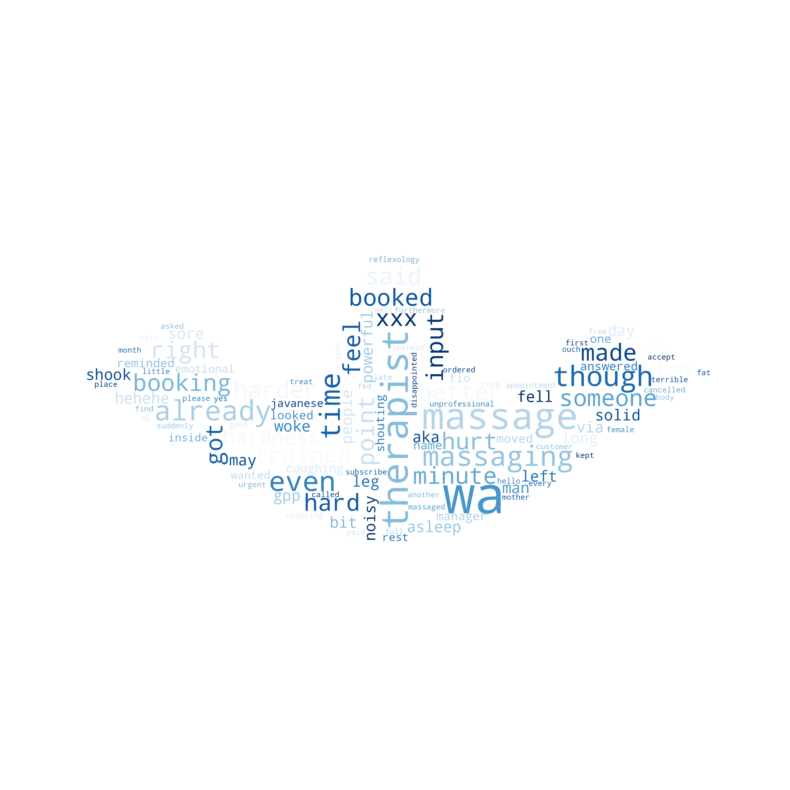

In [ ]:
colormap = ["Blues", "Blues_r", "gist_yarg"]

wc = WordCloud(
    background_color = "white",  # Background color of the word cloud
    mask = wc_mask,              # Shape of the word cloud (optional)
    # contour_width = 2,           # Width of the shape's contour
    # contour_color = "black",     # Color of the shape's contour
    colormap = colormap[0]           # Color scheme for the words
).generate(review_to_plot)   # Generate the word cloud from the text

plt.figure(figsize=[10, 10])
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()